# Load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('ECE 143.csv')
df.set_index(["State"], inplace=True)
# drop outlier
df = df.drop("California") 
df = df.drop("District of Columbia") # advanced degree outlier

<AxesSubplot:xlabel='sale', ylabel='State'>

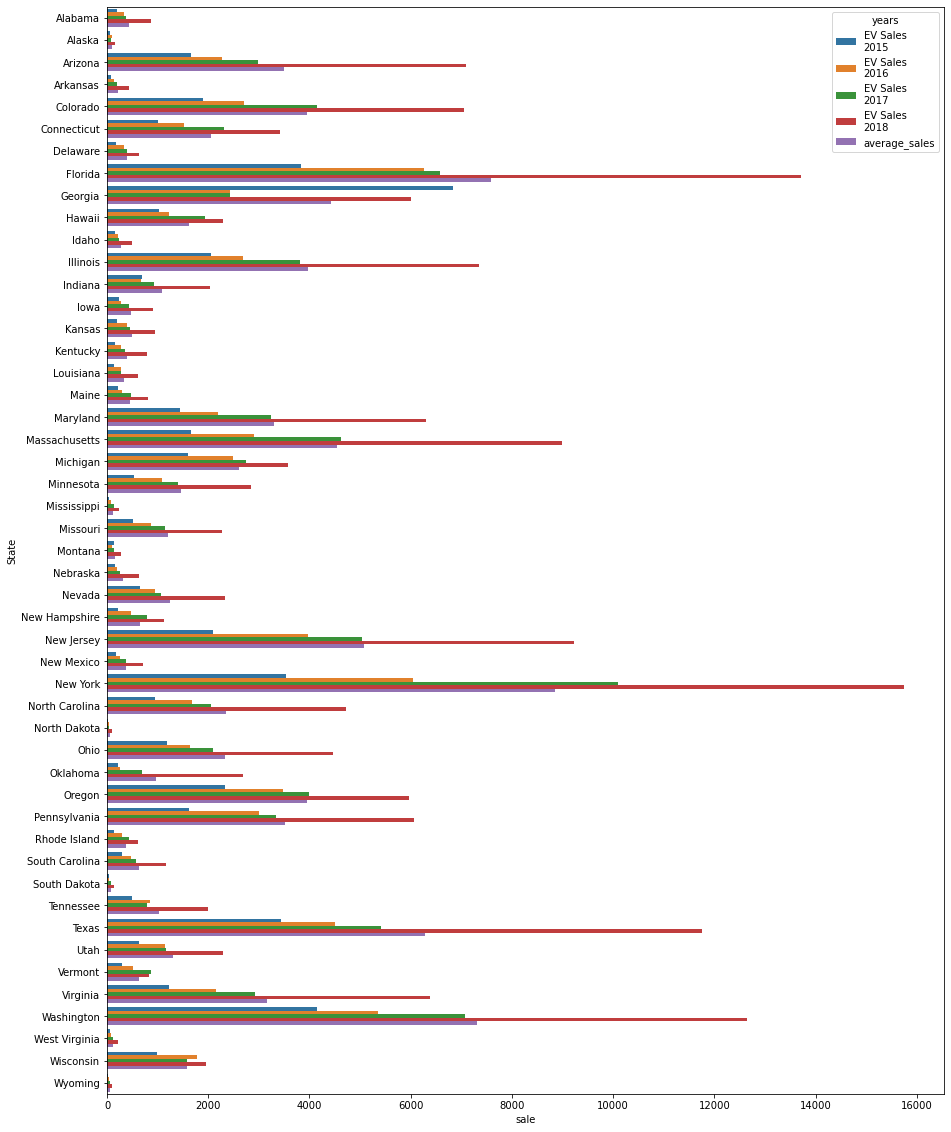

In [22]:
# Compute average sales and add to df
if 'average_sales' not in df:
    df.insert(4, 'average_sales', df.iloc[:,0:4].mean(axis=1).to_frame())
    df['average_sales'] = df['average_sales'].astype(int)
# Plot state sales data
sales_data = df.iloc[:,0:5]
sales_data['State'] = sales_data.index.get_level_values('State')
x=pd.melt(sales_data,id_vars="State", var_name="years", value_name="sale")
y=x.groupby(["State","years"]).sum()
y['State'] = y.index.get_level_values('State')
y['years'] = y.index.get_level_values('years')
plt.figure(figsize=(15,20))
sns.barplot(x='sale', y='State', hue="years",data=y)

# Linear regression

/Users/dtyoung/miniconda3/envs/ml/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dtyoung/miniconda3/envs/ml/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


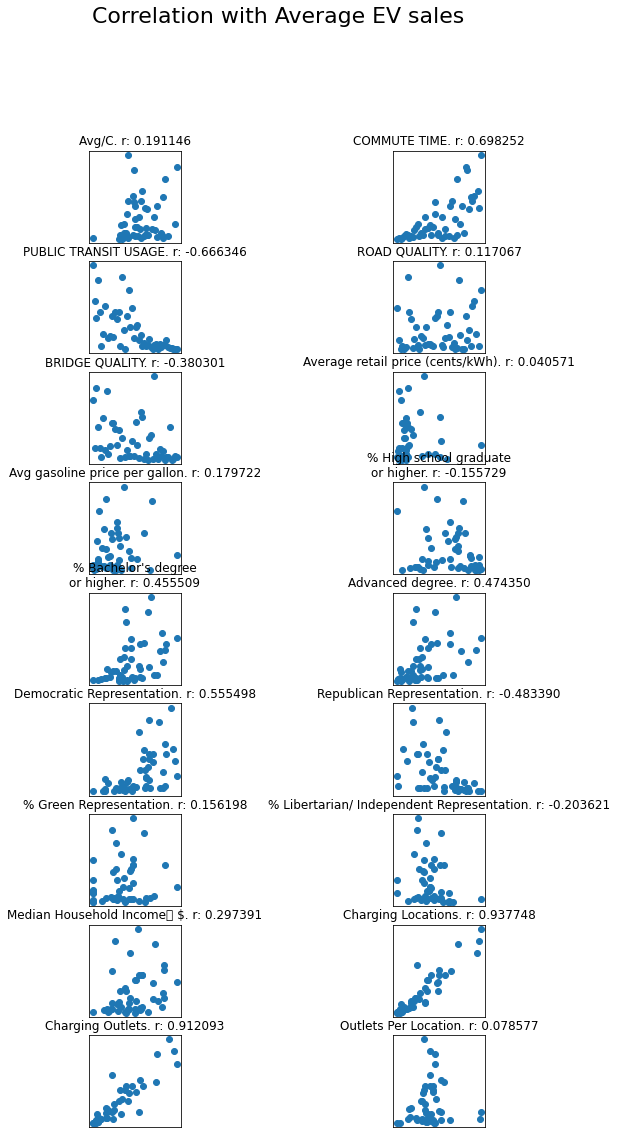

In [24]:
# Correlation plot between average sales and continuous features
avg_sales = df['average_sales']
avg_sales.apply(lambda x : (x-avg_sales.mean())/avg_sales.std())
cont_features = ['Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price (cents/kWh)','Avg gasoline price per gallon',
             '% High school graduate\nor higher',"% Bachelor's degree\nor higher",'Advanced degree','Democratic Representation','Republican Representation',
             '% Green Representation','% Libertarian/ Independent Representation','Median Household Income\t $','Charging Locations',
             'Charging Outlets','Outlets Per Location','EVs to Charging Outlets']
cont_cols = df.loc[:,cont_features]
cont_cols.columns = cont_features
fig = plt.figure(figsize=(10, 20))
fig.suptitle("Correlation with Average EV sales",fontsize=22)
for i in range(1,cont_cols.shape[1]):
    ax = fig.add_subplot(10, 2, i)
    # get feature, normalize and plot
    col = cont_cols.iloc[:,i-1].astype(float)
    col=col.apply(lambda x : (x-col.mean())/col.std())
    plt.plot(col.iloc[:], avg_sales.iloc[:], 'o')
    # set plot title, showing correlation value
    r = avg_sales.corr(col)
    plt.title("{}. r: {:2f}".format(col.name,r))
    # format plot
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))

Commute time, public transit usage, charging locations, charing outlets, democratic representation has |correlation score| > 0.5.  
--> Use for linear regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
Y = df["average_sales"]
X = df.loc[:,['COMMUTE TIME','PUBLIC TRANSIT USAGE','Charging Locations', 'Charging Outlets', 'Democratic Representation']]

# Normalize data
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Fit data and print coefficients
lrModel = LinearRegression()
x = X_normalized
y = Y
lrModel.fit(x,y)
print("Linear Regression score: " + str(lrModel.score(x,y)))
print("Weights:")
coeffs = [(X.columns[i], lrModel.coef_[i]) for i in range(len(X.columns))]
for i in range(len(X.columns))
    print(f"{}"tup)
print("Bias: " + str(lrModel.intercept_))

Linear Regression score: 0.906537414204083
Weights and bias
('COMMUTE TIME', 653.5127552015902)
('PUBLIC TRANSIT USAGE', -1153.4290184868687)
('Charging Locations', 9397.125076516293)
('Charging Outlets', -2578.547022618788)
('Democratic Representation', -280.6387681877298)
600.8149963377514


In [35]:

# lrModel = LinearRegression()
# x = cla.iloc[:,0]
# y = cla.iloc[:,1]
# x = np.array(x).reshape((len(x), 1))
# y = np.array(y).reshape((len(y), 1))
# lrModel.fit(x,y)
# lrModel.score(x,y)
lrModel = LinearRegression()
x = cla.iloc[:,0]
y = cla.iloc[:,1]
x = np.array(x).reshape((len(x), 1))
y = np.array(y).reshape((len(y), 1))
lrModel.fit(x,y)
print("One feature LR score: " + str(lrModel.score(x,y)))

# Use all features
x = lr_data_scaled
y = Y
# x = np.array(x).reshape((len(x), 1))
# y = np.array(y).reshape((len(y), 1))
lrModel.fit(x,y)
print("All feature LR score: " + str(lrModel.score(x,y)))
# def merge(list1, list2): 
#     merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
#     return merged_list
# print("Weights and bias")
# coeffs = merge(lr_data.columns,lrModel.coef_)
# for tup. in coeffs:
#     print()
# print(lrModel.intercept_)


One feature LR score: 0.863983538002592
All feature LR score: 0.9681872779493511


# Random forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
dx = pd.read_csv('ECE 143.csv')
dx=dx.drop(index=[4, 8])
dx['average_sales'] = dx.iloc[:,0:4].mean(axis=1).to_frame()
dx['average_sales']=dx['average_sales'].astype(int)
# dx=dx.iloc[:,[4,13,14,15,16,17]]
dx=dx.iloc[:,[34,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
dx.columns = ['average_sales', 'Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price','Avg gasoline price per gallon',
             'High school graduate or higher','Bachelors degree or higher','Advanced degree','Democratic Representation','Republican Representation',
             'Green Representation','Libertarian/ Independent Representation','Median Household Income','Tax Credit Program','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']


x, y = dx.iloc[:, 1:].values, dx.iloc[:, 0].values
# x, y = dx.iloc[:, 1:].values, Y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.nan_to_num(x_train)
np.nan_to_num(x_test)
np.nan_to_num(y_train)
np.nan_to_num(y_test)
feat_labels = dx.columns[1:]

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:

dx.head()


,average_sales,Avg/C,COMMUTE TIME,PUBLIC TRANSIT USAGE,ROAD QUALITY,BRIDGE QUALITY,Average retail price,Avg gasoline price per gallon,High school graduate or higher,Bachelors degree or higher,...,Republican Representation,Green Representation,Libertarian/ Independent Representation,Median Household Income,Tax Credit Program,Charging Locations,Charging Outlets,Outlets Per Location,EV Stock,EVs to Charging Outlets
0,302,17.1,25.0,43.0,13.0,22.0,9.83,2.54,0.853,0.245,...,0.621,0.0044,0.021,56200,0,115,268,2.33,2487,9.28
1,80,-3.0,8.0,20.0,35.0,36.0,20.22,3.38,0.924,0.290,...,0.513,0.0180,0.059,78394,0,16,26,1.62,534,20.54
2,2299,15.7,32.0,21.0,24.0,4.0,10.52,2.93,0.865,0.284,...,0.487,0.0133,0.041,70674,1,454,1223,2.69,18129,14.82
3,133,15.8,10.0,47.0,36.0,17.0,8.22,2.58,0.856,0.220,...,0.606,0.0084,0.026,54539,0,72,196,2.72,1194,6.09
5,2921,7.3,33.0,14.0,32.0,13.0,10.17,2.81,0.911,0.394,...,0.433,0.0138,0.052,72499,1,692,1857,2.68,19738,10.63


importance： [0.04897226 0.04887659 0.04897652 0.0527415  0.0565578  0.04689592
 0.0495685  0.04848422 0.04875726 0.04723154 0.04781173 0.04690075
 0.04778965 0.04576478 0.04519448 0.01322681 0.04662998 0.04659703
 0.05768894 0.05404529 0.05128844]
 1) Outlets Per Location           0.057689
 2) BRIDGE QUALITY                 0.056558
 3) EV Stock                       0.054045
 4) ROAD QUALITY                   0.052742
 5) EVs to Charging Outlets        0.051288
 6) Avg gasoline price per gallon  0.049569
 7) PUBLIC TRANSIT USAGE           0.048977
 8) Avg/C                          0.048972
 9) COMMUTE TIME                   0.048877
10) Bachelors degree or higher     0.048757
11) High school graduate or higher 0.048484
12) Democratic Representation      0.047812
13) Green Representation           0.047790
14) Advanced degree                0.047232
15) Republican Representation      0.046901
16) Average retail price           0.046896
17) Charging Locations             0.046630
18) 

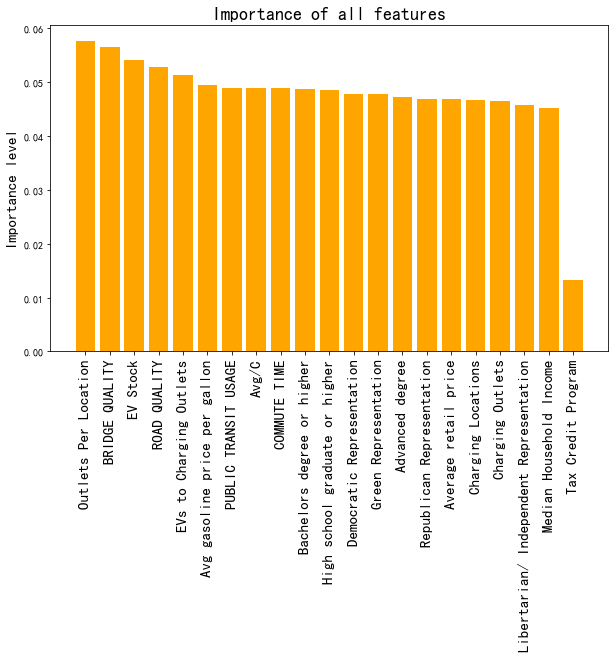

In [73]:
importances = forest.feature_importances_
print("importance：", importances)

x_columns = dx.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])
plt.figure(figsize=(10, 6))
plt.title("Importance of all features", fontsize=18)
plt.ylabel("Importance level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()